## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [3]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [4]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [29]:
# We will be trying to predict the math_score for practice but in reality any of them can be used!
X = df.drop(columns=['math_score'], axis=1)


In [19]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [20]:
y = df['math_score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [30]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [31]:
# Creating a pipeline
# Create column transformer with three types of transformers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

# 1st One hot encoder should happen
# 2nd Standard scaler should happen
# Then the Column Transformer should be created which will combine both the transformations together

# Initilizing the transformers
num_transformer = StandardScaler()
ohe_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", ohe_transformer, cat_features), # 1
        ("StandardScaler", num_transformer, num_features), # 2
    ]
)

In [32]:
X = preprocessor.fit_transform(X)

In [35]:
X.shape

(1000, 19)

In [38]:
# Seperate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.8, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((200, 19), (800, 19), (200,), (800,))

#### Create an Evaluate Function to give all metrics after model Training

In [39]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [40]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "KNeighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "SVR": SVR(),
    "XGB Regressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # This will train the model to the model in use

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test Dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i]) # Append model name to list

    print("Model Performance For Training Set")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))

    print("----------------------------------")

    print("Model Performance For Test Set")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    r2_list.append(model_test_r2) # Append r2 score to list

    print("="*35)
    print("\n")

Linear Regression
Model Performance For Training Set
- Root Mean Squared Error: 4.9901
- R2 Score: 0.8870
- Mean Absolute Error: 3.9809
- Mean Squared Error: 24.9008
----------------------------------
Model Performance For Test Set
- Root Mean Squared Error: 5.5258
- R2 Score: 0.8683
- Mean Absolute Error: 4.4065
- Mean Squared Error: 30.5346


Ridge Regression
Model Performance For Training Set
- Root Mean Squared Error: 4.9942
- R2 Score: 0.8868
- Mean Absolute Error: 3.9777
- Mean Squared Error: 24.9421
----------------------------------
Model Performance For Test Set
- Root Mean Squared Error: 5.5178
- R2 Score: 0.8687
- Mean Absolute Error: 4.3915
- Mean Squared Error: 30.4464


Lasso Regression
Model Performance For Training Set
- Root Mean Squared Error: 6.4813
- R2 Score: 0.8094
- Mean Absolute Error: 5.0883
- Mean Squared Error: 42.0068
----------------------------------
Model Performance For Test Set
- Root Mean Squared Error: 6.7498
- R2 Score: 0.8036
- Mean Absolute Error: 

### Results

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending=False)

,Model Name,R2 Score
1,Ridge Regression,0.868726
0,Linear Regression,0.868345
8,CatBoost Regressor,0.818033
5,Random Forest Regressor,0.815866
2,Lasso Regression,0.803563
9,AdaBoost Regressor,0.799912
7,XGB Regressor,0.754930
3,KNeighbors Regressor,0.737099
4,Decision Tree Regressor,0.674717
6,SVR,0.572919


## Linear Regression

In [43]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred) *100
print(f"Accuracy of the model is {score:.2f} %")

Accuracy of the model is 86.83 %


## Plot y_pred and y_test

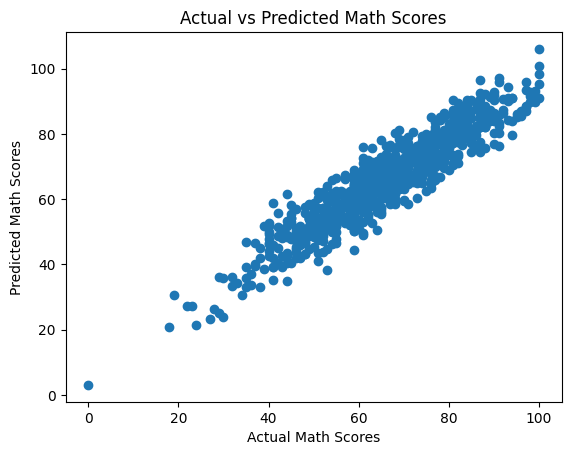

In [44]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Actual vs Predicted Math Scores")
plt.show()

<Axes: xlabel='math_score'>

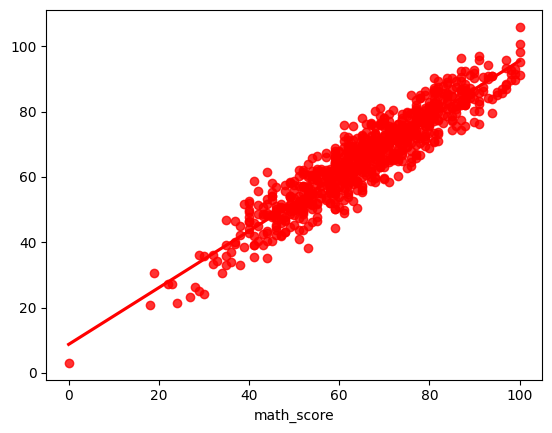

In [45]:
sns.regplot(x=y_test, y=y_pred, ci=None, color ='red')

#### Difference between Actual and Predicted Values

In [48]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_test - y_pred})
pred_df


,Actual,Predicted,Difference
521,91,76.312627,14.687373
737,53,59.875190,-6.875190
740,80,77.421754,2.578246
660,74,77.922153,-3.922153
411,84,88.354792,-4.354792
...,...,...,...
619,65,67.607378,-2.607378
855,97,88.482397,8.517603
803,82,81.358974,0.641026
645,65,70.027290,-5.027290
